# **Rahul Agrawal**
## LetsgrowMore Virtual Internship Task 2 Level **Advance**

## Convolutional Neural Network that reads handwritten Numbers/Digits



In [1]:
#  Importing requires libraries

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot  as plt
import random
from tensorflow.keras import Sequential
from tensorflow import keras

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout , MaxPooling2D

In [2]:
# loading dataset 

(X_train , y_train) , (X_test , y_test)=mnist.load_data()

In [3]:
print("Length Of Train Dataset is :" ,len(X_train),"  \tAnd \n\tLength Of Test Dataset is :",len(X_test))
print(f" with Img Size = {X_train.shape[1:]}")  

Length Of Train Dataset is : 60000   	And 
	Length Of Test Dataset is : 10000
 with Img Size = (28, 28)


In [4]:
values=[]
for i in range(28):
    values.append(max(X_train[0][i]))
print("Min value of pixel intensity in X is ",min(values)," And Max value of pixel intensity in X is ",max(values))

Min value of pixel intensity in X is  0  And Max value of pixel intensity in X is  255


**Rescaling Features**

In [5]:
X_train = X_train / 255
X_test = X_test/255

In [6]:
values=[]
for i in range(28):
    values.append(max(X_train[0][i]))
print("Min value of pixel intensity in X is ",min(values)," And Max value of pixel intensity in X is ",max(values))

Min value of pixel intensity in X is  0.0  And Max value of pixel intensity in X is  1.0


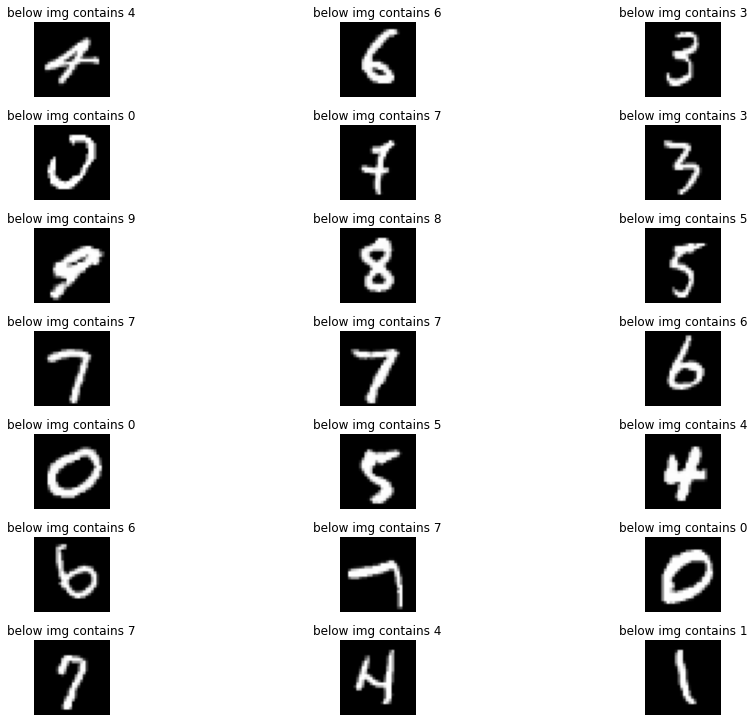

In [7]:
fig=plt.figure(figsize=(13,13))
for i in range(21):
    r = random.randint(0,60000)
    plt.subplot(9,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[r], cmap=plt.get_cmap('gray'))
    plt.title(f"below img contains {y_train[r]}")
    plt.axis('off')



In [8]:
print('X_train shape before reshaping:', X_train.shape) 
print('X_test shape before reshaping:', X_test.shape) 

X_train=np.array(X_train).reshape(-1,28,28,1)
X_test=np.array(X_test).reshape(-1,28,28,1)

print('X_train shape after reshaping:', X_train.shape) 
print('X_test shape after reshaping:', X_test.shape) 

X_train shape before reshaping: (60000, 28, 28)
X_test shape before reshaping: (10000, 28, 28)
X_train shape after reshaping: (60000, 28, 28, 1)
X_test shape after reshaping: (10000, 28, 28, 1)


## **Building Model**

### checking System Configuration

In [9]:
phy_dev=tf.config.experimental.list_physical_devices()
print('Available Resources are :',phy_dev)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Available Resources are : [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11369372953032039804
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11345264640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8191603159687142354
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


### Adding Layers To Model with Input

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu' , input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

### Compiling Model 

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training Model

In [12]:
model.fit(X_train , y_train ,epochs=30 )

Epoch 1/30
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2689 - accuracy: 0.9174
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0823 - accuracy: 0.9756
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0580 - accuracy: 0.9823
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0457 - accuracy: 0.9862
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0384 - accuracy: 0.9884
Epoch 6/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0332 - accuracy: 0.9898
Epoch 7/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0265 - accuracy: 0.9919
Epoch 8/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 9/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0191 - accuracy: 0.9943
Epoch 10/30
1875/1875 [==============================] - 13s 7ms/step - l

### Model Validation Score

In [13]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0790 - accuracy: 0.9888


[0.07904335856437683, 0.9887999892234802]

In [14]:
y_pred =model.predict(X_test)

In [15]:
np.argmax(y_pred[0])

7

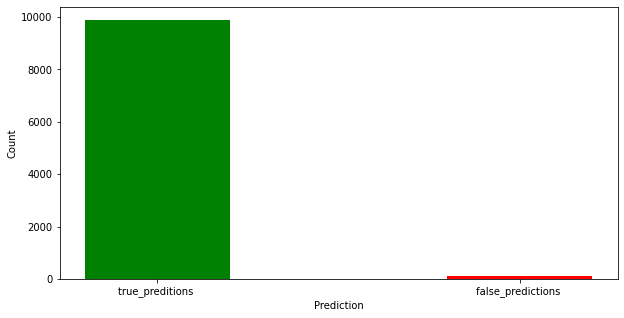

accuracy of prediction is : 98.88 %


In [16]:
true_pred=0

for i in range(len(X_test)):
  if np.argmax(y_pred[i])==y_test[i]:
    true_pred=true_pred+1

  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['true_preditions ' , 'false_predictions '], [true_pred ,len(X_test)-true_pred ], color =['g','r'],
        width = 0.4)
 
plt.xlabel("Prediction")
plt.ylabel("Count")

plt.show()

print("accuracy of prediction is :",(true_pred/len(X_test))*100 ,"%")